### Evaluating Clusters Inferred by MMIDAS
This notebook guides you in evaluating the categorical variables, i.e. cell clusters inferred by MMIDAS, without knowing the ground truth. Here we demonstrate the results of two analysis:
1) A classification task that measures the post hoc identifiability of cluster labels through a 10-fold random train-test sampling approach.
2) Silhouette analysis

In [1]:
import pickle
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

from mmidas.utils.tools import get_paths
from mmidas.utils.dataloader import load_data
from mmidas.utils.tree_based_analysis import get_merged_types

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
toml_file = 'pyproject.toml'
sub_file = 'smartseq_files'
config = get_paths(toml_file=toml_file, sub_file=sub_file)
data_path = config['paths']['main_dir'] / config['paths']['data_path']
data_file = data_path / config[sub_file]['anndata_file']
data = load_data(datafile=data_file)

/Users/yeganeh.marghi/github/MMIDAS/pyproject.toml
Getting files directories belong to smartseq_files...
data is loaded!
 --------- Data Summary --------- 
num cell types: 115, num cells: 22365, num genes:5032


In [3]:
saving_folder = config['paths']['main_dir'] / config['paths']['saving_path']
trained_model_folder = config[sub_file]['trained_model']
saving_folder = str(saving_folder / trained_model_folder)

In [4]:
n_ttype = data['n_type'] # number of t-types in the taxonomy (scrattch.hicat)
K_fold = 10 # number of folds for K-fold cross-validation
model_order = 92 # obtained from K_selection
latent_dim = 10 # # latent dimensionality of the non-linear embedding
n_arm = 2 # number of arms in MMIDAS

In [5]:
date = '20231121' 


data_file_id = saving_folder + f"/clustering/Ttype_classification_K_{n_ttype}_nFeature_100_{date}.p" 
sum_dict = pickle.load(open(data_file_id, "rb")) 
acc_T_pc = sum_dict['acc_T_adj']
sc_T_pc = sum_dict['sc_T']
conf_T_pc = sum_dict['conf_mat']

data_file_id = saving_folder + f"/clustering/Ttype_classification_K_{n_ttype}_nFeature_{latent_dim}_{date}.p" 
sum_dict = pickle.load(open(data_file_id, "rb")) 
acc_T_scvi = sum_dict['acc_T_adj']
sc_T_scvi = sum_dict['sc_T']
conf_T_scvi = sum_dict['conf_mat']

data_file_id = saving_folder + f"/clustering/Ttype_classification_K_{model_order}_nFeature_100_{date}.p" 
sum_dict = pickle.load(open(data_file_id, "rb")) 
acc_merged_T_pc = sum_dict['acc_T_adj']
sc_mergT_pc = sum_dict['sc_T']
conf_mergT_pc = sum_dict['conf_mat']

data_file_id = saving_folder + f"/clustering/Ttype_classification_K_{model_order}_nFeature_{latent_dim}_{date}.p" 
sum_dict = pickle.load(open(data_file_id, "rb")) 
acc_merged_T_scvi = sum_dict['acc_T_adj']
sc_mergT_scvi = sum_dict['sc_T']
conf_mergT_scvi = sum_dict['conf_mat']

acc_T_lowD = []
acc_T_lowD_D = []
sc_T_lowD = []
sc_T_lowD_D = []

acc_merged_T_lowD = []
acc_merged_T_lowD_D = []
sc_mergT_lowD = []
sc_mergT_lowD_D = []

acc_cons_pc = []
acc_cons_scvi = []
acc_cons_lowD = []
acc_cons_lowD_D = []
sc_cons_pc = []
sc_cons_scvi = []
sc_cons_lowD = []
sc_cons_lowD_D = []

conf_T_lowD = []
conf_T_lowD_D = []
conf_mergT_lowD = []
conf_mergT_lowD_D = []
conf_cons_pc = []
conf_cons_scvi = []
conf_cons_lowD = []
conf_cons_lowD_D = []

for arm in range(n_arm):
    data_file_id = saving_folder + f"/clustering/Ttype_classification_K_{n_ttype}_nFeature_{latent_dim}_arm_{arm}_{date}.p" 
    sum_dict = pickle.load(open(data_file_id, "rb")) 
    acc_T_lowD.append(sum_dict['acc_T_adj'])
    sc_T_lowD.append(sum_dict['sc_T'][-1])
    conf_T_lowD.append(sum_dict['conf_mat'])
    
    data_file_id = saving_folder + f"/clustering/Ttype_classification_K_{model_order}_nFeature_{latent_dim}_arm_{arm}_{date}.p" 
    sum_dict = pickle.load(open(data_file_id, "rb")) 
    acc_merged_T_lowD.append(sum_dict['acc_T_adj'])
    sc_mergT_lowD.append(sum_dict['sc_T'][-1])
    conf_mergT_lowD.append(sum_dict['conf_mat'])
    
    data_file_id = saving_folder + f"/clustering/ConsType_classification_K_{model_order}_nFeature_100_arm_{arm}_{date}.p" 
    sum_dict = pickle.load(open(data_file_id, "rb")) 
    acc_cons_pc.append(sum_dict['acc_T_adj'])
    sc_cons_pc.append(sum_dict['sc_T'][-1])
    conf_cons_pc.append(sum_dict['conf_mat'])

    data_file_id = saving_folder + f"/clustering/ConsType_classification_K_{model_order}_nFeature_{latent_dim}_arm_{arm}_{date}.p" 
    sum_dict = pickle.load(open(data_file_id, "rb")) 
    acc_cons_scvi.append(sum_dict['acc_T_adj'])
    sc_cons_scvi.append(sum_dict['sc_T'][-1])
    conf_cons_scvi.append(sum_dict['conf_mat'])
    
    data_file_id = saving_folder + f"/clustering/ConsType_classification_K_{model_order}_nFeature_{latent_dim}_arm_{arm}_{date}.p" 
    sum_dict = pickle.load(open(data_file_id, "rb")) 
    acc_cons_lowD.append(sum_dict['acc_T_adj'])
    sc_cons_lowD.append(sum_dict['sc_T'][-1])
    conf_cons_lowD.append(sum_dict['conf_mat'])

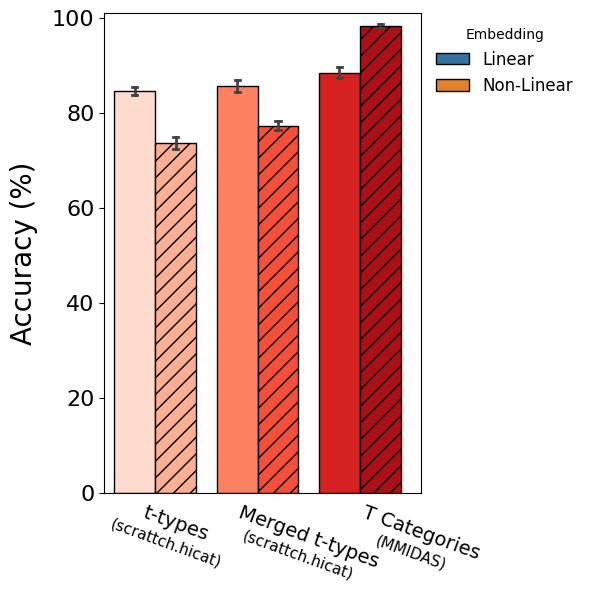

In [6]:
acc_T_lowDs = np.mean(np.vstack((acc_T_lowD[0], acc_T_lowD[1])), axis=0)
acc_Ttype = np.concatenate((acc_T_pc, acc_T_lowDs)) * 100

acc_merged_T_lowDs = np.mean(np.vstack((acc_merged_T_lowD[0], acc_merged_T_lowD[1])), axis=0)
acc_merg_Ttype = np.concatenate((acc_merged_T_pc, acc_merged_T_lowDs)) * 100

acc_cons_PCs = np.mean(np.vstack((acc_cons_pc[0], acc_cons_pc[1])), axis=0)
acc_cons_lowDs = np.mean(np.vstack((acc_cons_lowD[0], acc_cons_lowD[1])), axis=0)
acc_cons = np.concatenate((acc_cons_PCs, acc_cons_lowDs)) * 100

n_cond = 2
df = pd.DataFrame({'Accuracy': np.concatenate((acc_Ttype, acc_merg_Ttype, acc_cons)),
                   'Cell Types': ["t-type"]*n_cond*K_fold + ["Merged t-type"]*n_cond*K_fold + ["MMIDAS T"]*n_cond*K_fold, 
                   'Class_Embedding': np.hstack([['Linear']*K_fold + ['Non-Linear']*K_fold]*3)})

plt.close('all')
fig, ax = plt.subplots(1,1,figsize=[6, 6])
sns.reset_defaults()

sns.barplot(data=df, x='Cell Types',y='Accuracy', hue='Class_Embedding', ax=ax, width=.8, errorbar="sd", capsize=.1, errwidth=2, edgecolor='black')
pal = sns.color_palette('Reds', n_colors=6)
palette_list = [pal.as_hex()[::2], pal.as_hex()[1::2]]
for bars, hatch, legend_handle, palette in zip(ax.containers, ['', '//'], ax.legend_.legendHandles, palette_list):
     for bar, color in zip(bars, palette):
          bar.set_facecolor(color)
          bar.set_hatch(hatch)
     # update the existing legend, use twice the hatching pattern to make it denser
     legend_handle.set_hatch(hatch + hatch)


handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(title='Embedding', frameon=False, loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('10') 
ax.set_ylim([0, 101])
fontsize = 20
positions = [0.2, 1.5, 2.6]
ax.set_ylabel('Accuracy (%)', fontsize=fontsize, labelpad=10)
ax.set_xlabel('')
ax.set_xticks(positions)
ax.set_xticklabels(["t-types", "Merged t-types", "T Categories"])
ax.xaxis.set_tick_params(labelsize=fontsize - 6)
ax.yaxis.set_tick_params(labelsize=fontsize - 4)
ax.xaxis.set_ticks_position('none') 

for item in ax.get_xticklabels():
    item.set_rotation(-20)

texts = ["(scrattch.hicat)", "(scrattch.hicat)", "(MMIDAS)"]
positions_x = [0.1, 1.4, 2.5]
positions_y = [-10.5, -13, -12.5]
for pos_x, pox_y, text in zip(positions_x, positions_y, texts):
    ax.text(pos_x, pox_y, text, ha='center', va='center', fontsize=11, rotation=-20)

ax.grid(False) 
fig.tight_layout()
fig.savefig(saving_folder + f'/classAcc_RF_K_{model_order}.png', dpi=600, bbox_inches='tight')
plt.show()

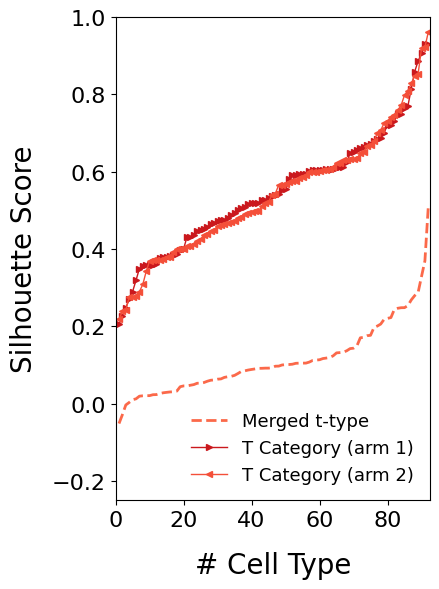

In [7]:
plt.close('all')
plt.figure(figsize=[4.5, 6], dpi=100)
clrs = ['#e57f7f', '#b70000']
mks = ['>', '<']

pal = sns.color_palette('Reds', n_colors=3)
palette1 = pal.as_hex()

pal = sns.color_palette('Reds', n_colors=6)
palette2 = pal.as_hex()

clrs = [palette1[2], palette2[3]]

plt.plot(np.arange(model_order)+1, np.sort(sc_mergT_pc), linewidth=2, linestyle='--', 
         label='Merged t-type', color=palette1[1])
for arm in range(n_arm):
    plt.plot(np.arange(model_order)+1, np.sort(sc_cons_lowD[arm]), linewidth=1, marker=mks[arm], 
             markersize=4, label=f'T Category (arm {arm+1})', color=clrs[arm])

fontsize = 20
plt.xlabel('# Cell Type', fontsize=fontsize, labelpad=15)
plt.xticks(fontsize=fontsize - 4)
plt.ylabel('Silhouette Score', fontsize=fontsize, labelpad=10)
plt.yticks(fontsize=fontsize - 4)
plt.ylim([-.25, 1])
plt.xlim([0, model_order+0.5])
plt.legend(fontsize=13, loc="lower right", frameon=False)
plt.tight_layout()
plt.savefig(saving_folder + f'/SC_K_{model_order}_{date}.png', dpi=600, bbox_inches='tight')
plt.show()

In [8]:
# Loading the taxonomy tree and ordering the clusters according to the tree
htree_file = data_path / config[sub_file]['htree_file']
data['cluster'] = np.array([c.strip() for c in data['cluster']])
T_class = np.unique(data['cluster'])
n_cluster = len(T_class)
merged_cells_labels, treeobj, _ = get_merged_types(htree_file=htree_file, cells_labels=data['cluster'], num_classes=1)
idd = []
for i, s in enumerate(treeobj.child):
    s = s.strip()
    if (T_class == s).any():
        cluster_id = list(T_class).index(s)
        idd.append(cluster_id)
        
T_class_ord = T_class[idd]

row_sort_T = []
for s in T_class_ord:
    row_sort_T.append(list(T_class).index(s))

row_sort_T = np.array(row_sort_T)

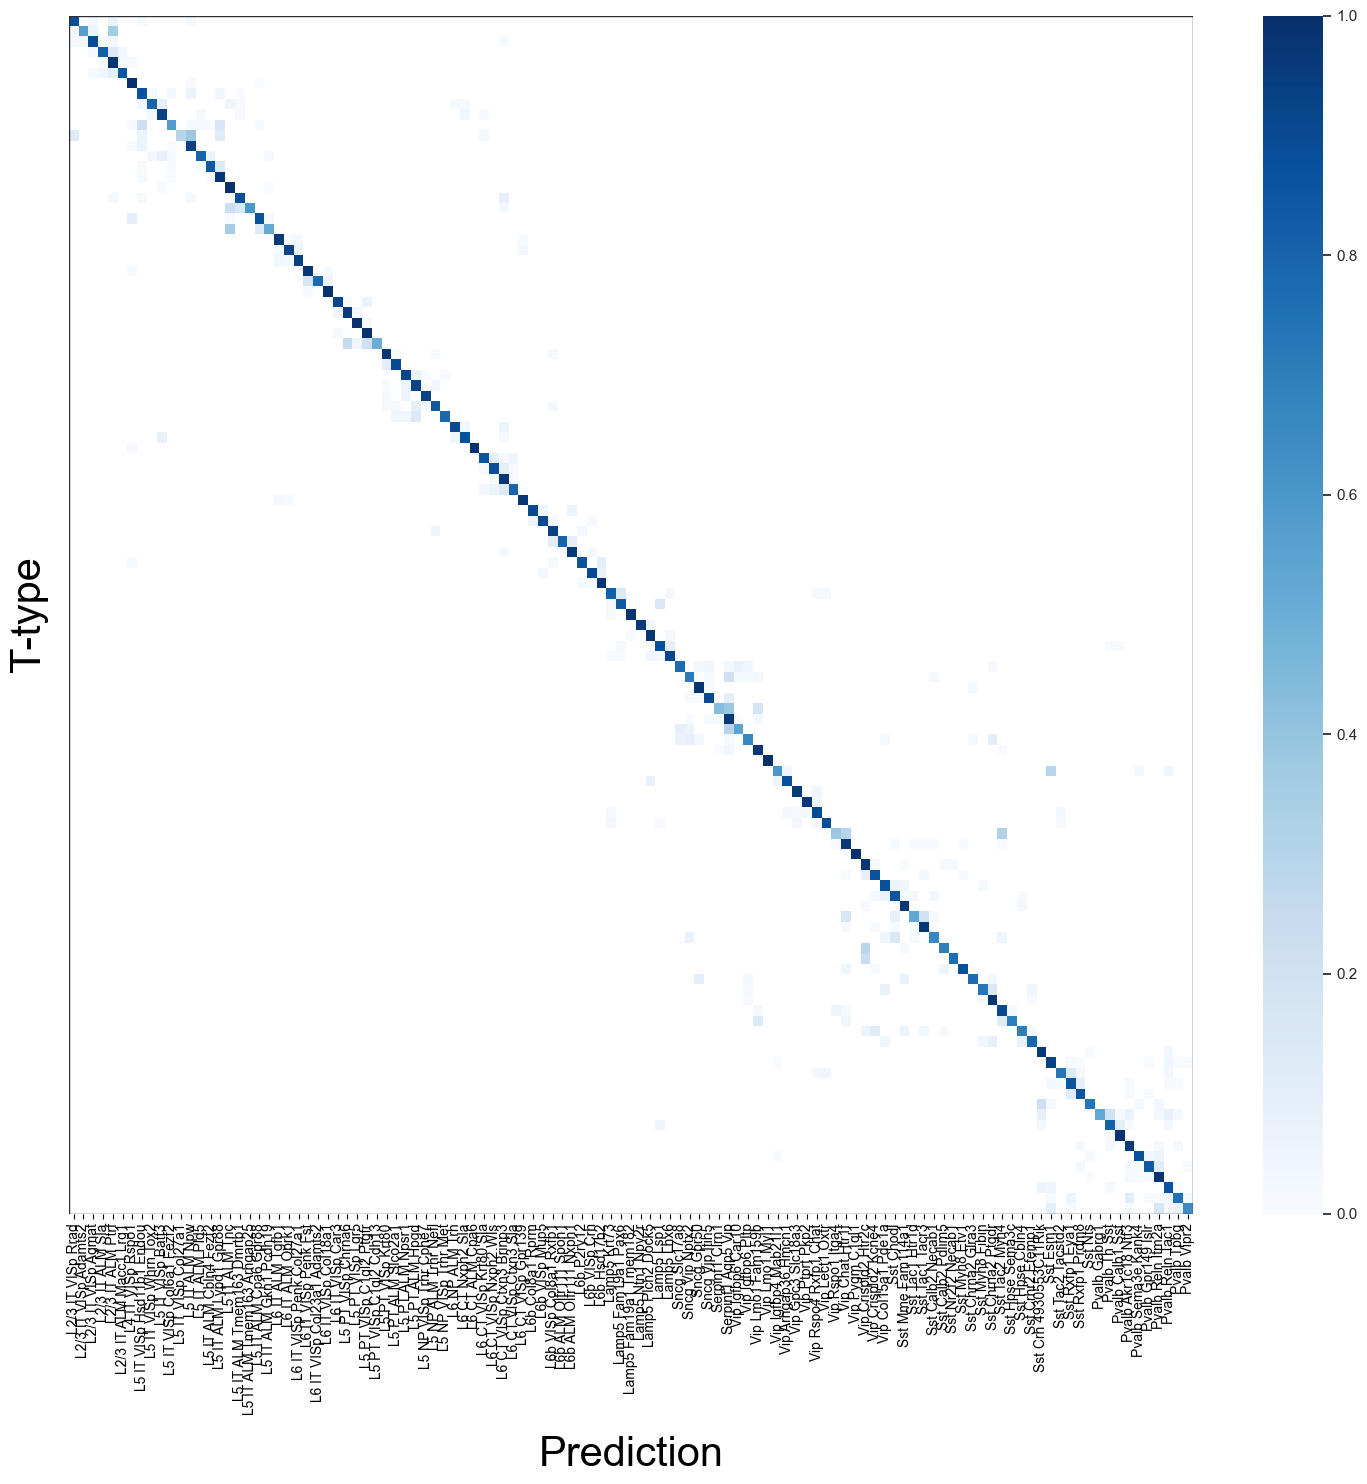

In [9]:
eps = 1e-3
plt.close('all')
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
sns.set(font_scale=1.)
conf_T_pc[conf_T_pc < eps] = 0.
mat = conf_T_pc
sns.set_theme()
sns.set(rc={'axes.facecolor':'white'})
sns.heatmap(mat, xticklabels=T_class_ord, yticklabels=[], vmin=0, vmax=1, ax=axs, cmap='Blues', 
            cbar_kws={"shrink": 1}, mask=(mat==0))
axs.set_ylabel('T-type', fontsize=30, labelpad=15)
axs.set_xlabel('Prediction', fontsize=30, labelpad=15)
axs.set_yticklabels(axs.get_yticklabels())
axs.axhline(y=0, color='#2d2d2d',linewidth=1)
axs.axhline(y=mat.shape[0], color='#2d2d2d',linewidth=1)
axs.axvline(x=0, color='#2d2d2d',linewidth=1)
axs.axvline(x=mat.shape[1], color='#2d2d2d',linewidth=1)
fig.tight_layout()
fig.savefig(saving_folder + f'/conf_Ttype_pc.png', dpi=1000, bbox_inches='tight')
plt.show()

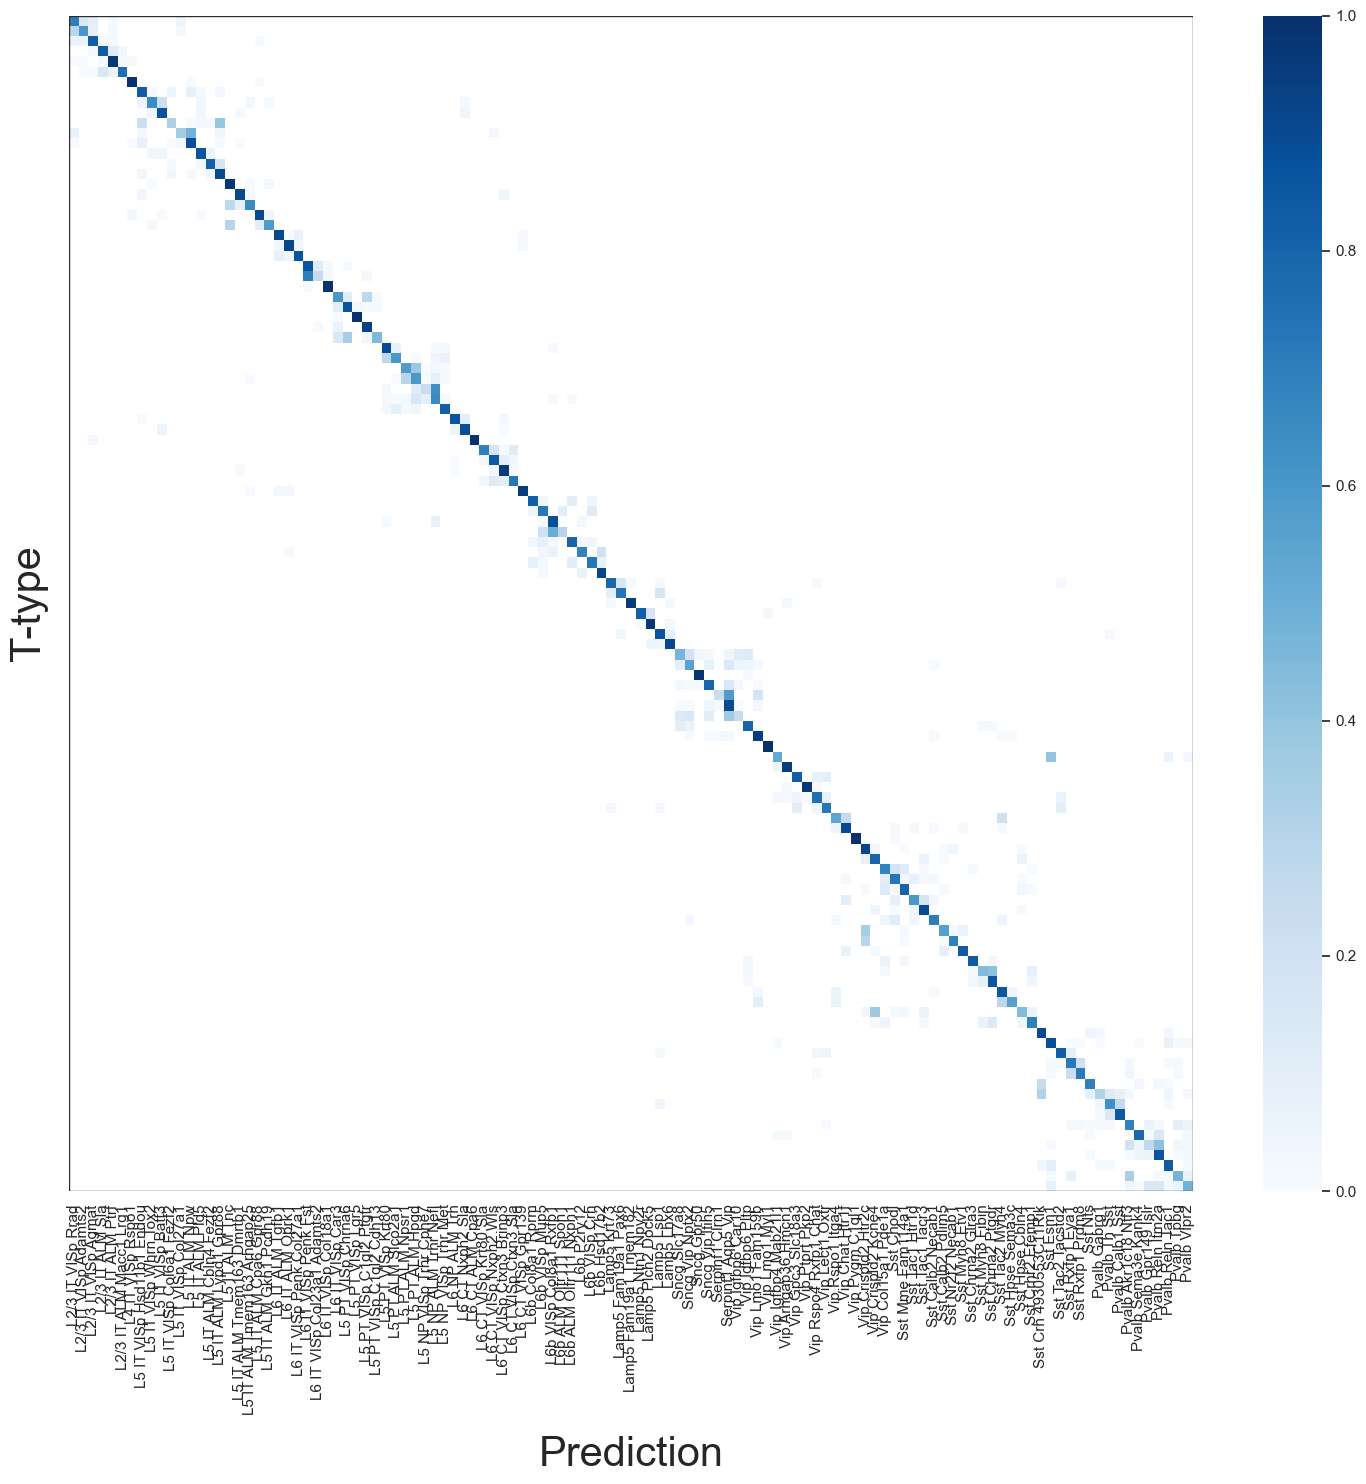

In [10]:
eps = 1e-3
plt.close('all')
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
sns.set(font_scale=1.)
mat = conf_T_lowD[0]
mat[mat < eps] = 0.
sns.set_theme()
sns.set(rc={'axes.facecolor':'white'})
sns.heatmap(mat, xticklabels=T_class_ord, yticklabels=[], vmin=0, vmax=1, ax=axs, cmap='Blues', 
            cbar_kws={"shrink": 1}, mask=(mat==0))
axs.set_ylabel('T-type', fontsize=30, labelpad=15)
axs.set_xlabel('Prediction', fontsize=30, labelpad=15)
axs.set_yticklabels(axs.get_yticklabels())
axs.axhline(y=0, color='#2d2d2d',linewidth=1)
axs.axhline(y=mat.shape[0], color='#2d2d2d',linewidth=1)
axs.axvline(x=0, color='#2d2d2d',linewidth=1)
axs.axvline(x=mat.shape[1], color='#2d2d2d',linewidth=1)
fig.tight_layout()
fig.savefig(saving_folder + f'/conf_Ttype_lowD.png', dpi=1000, bbox_inches='tight')
plt.show()

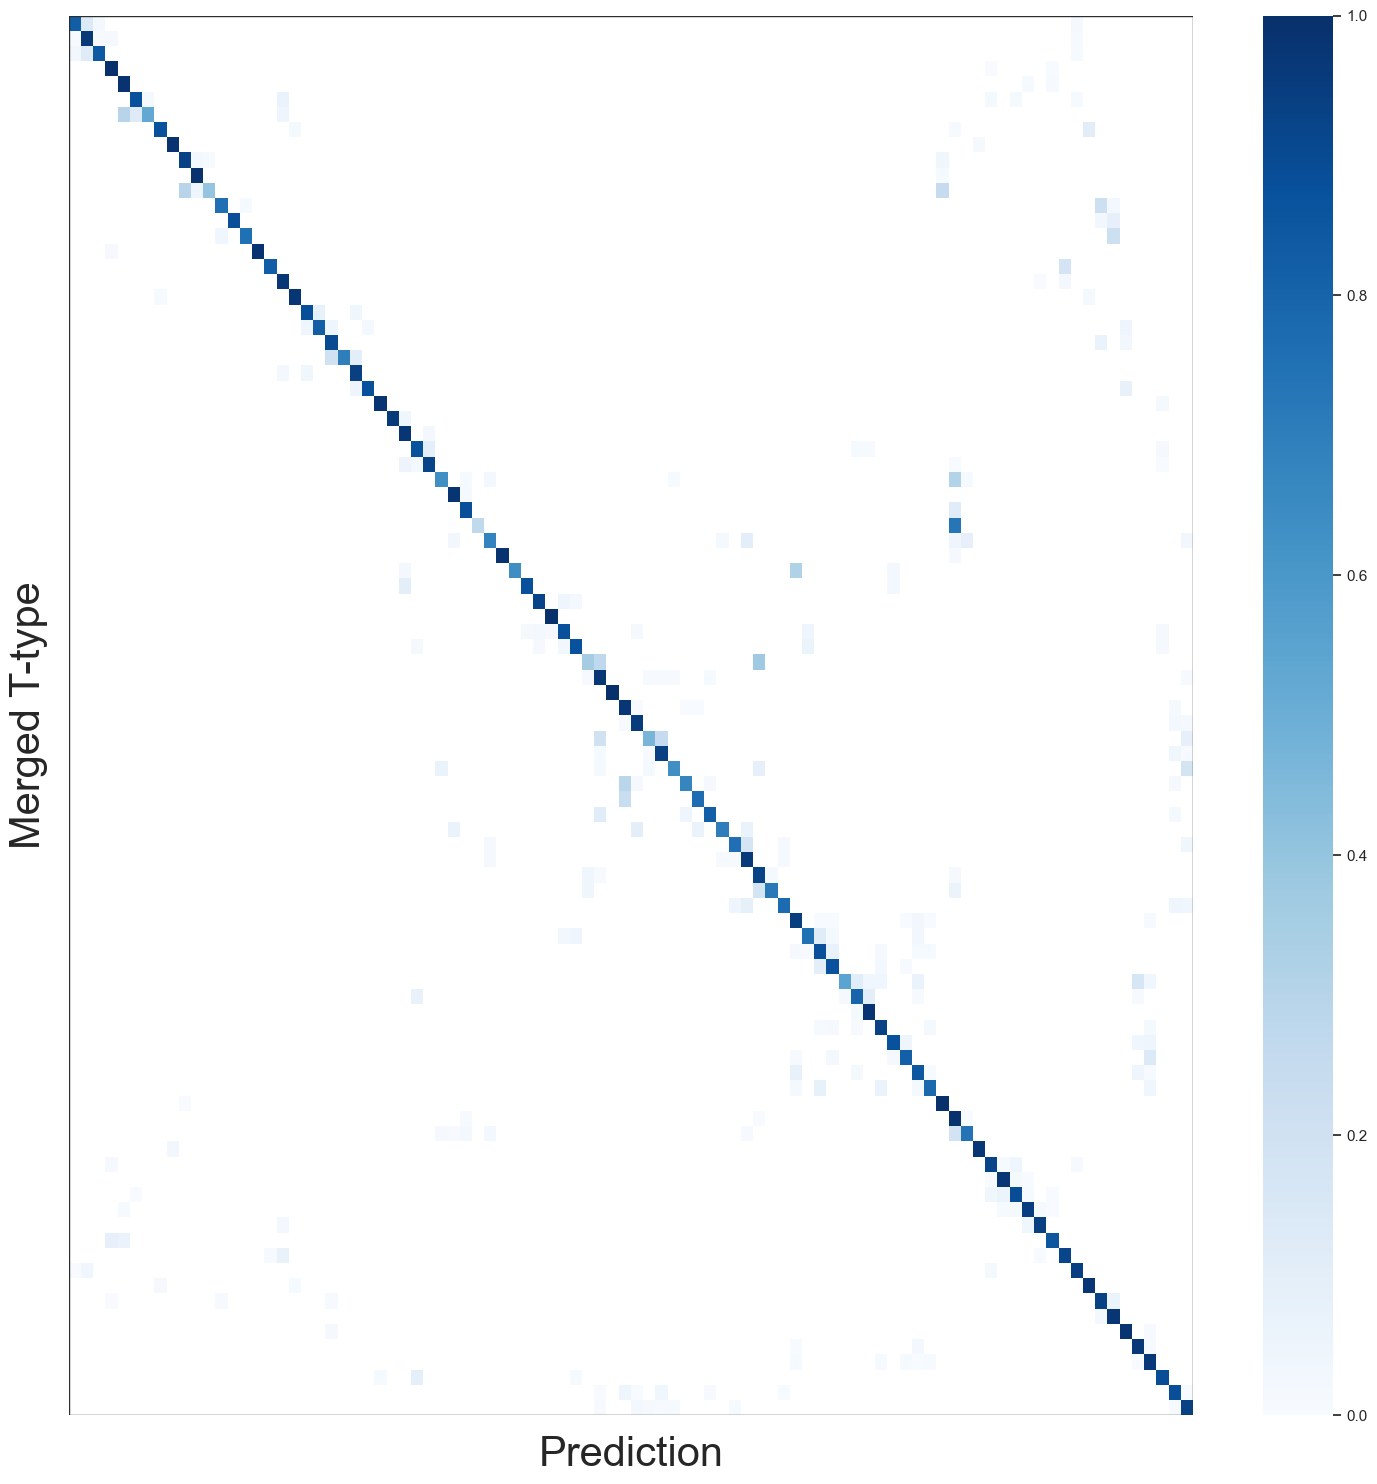

In [11]:
eps = 1e-3
plt.close('all')
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
sns.set(font_scale=1.)
conf_mergT_pc[conf_mergT_pc < eps] = 0.
mat = conf_mergT_pc
sns.set_theme()
sns.set(rc={'axes.facecolor':'white'})
sns.heatmap(mat, xticklabels=[], yticklabels=[], vmin=0, vmax=1, ax=axs, cmap='Blues', 
            cbar_kws={"shrink": 1}, mask=(mat==0))
axs.set_ylabel('Merged T-type', fontsize=30, labelpad=15)
axs.set_xlabel('Prediction', fontsize=30, labelpad=15)
axs.set_yticklabels(axs.get_yticklabels())
axs.axhline(y=0, color='#2d2d2d',linewidth=1)
axs.axhline(y=mat.shape[0], color='#2d2d2d',linewidth=1)
axs.axvline(x=0, color='#2d2d2d',linewidth=1)
axs.axvline(x=mat.shape[1], color='#2d2d2d',linewidth=1)
fig.tight_layout()
fig.savefig(saving_folder + f'/conf_merged_Ttype_pc.png', dpi=1000, bbox_inches='tight')
plt.show()

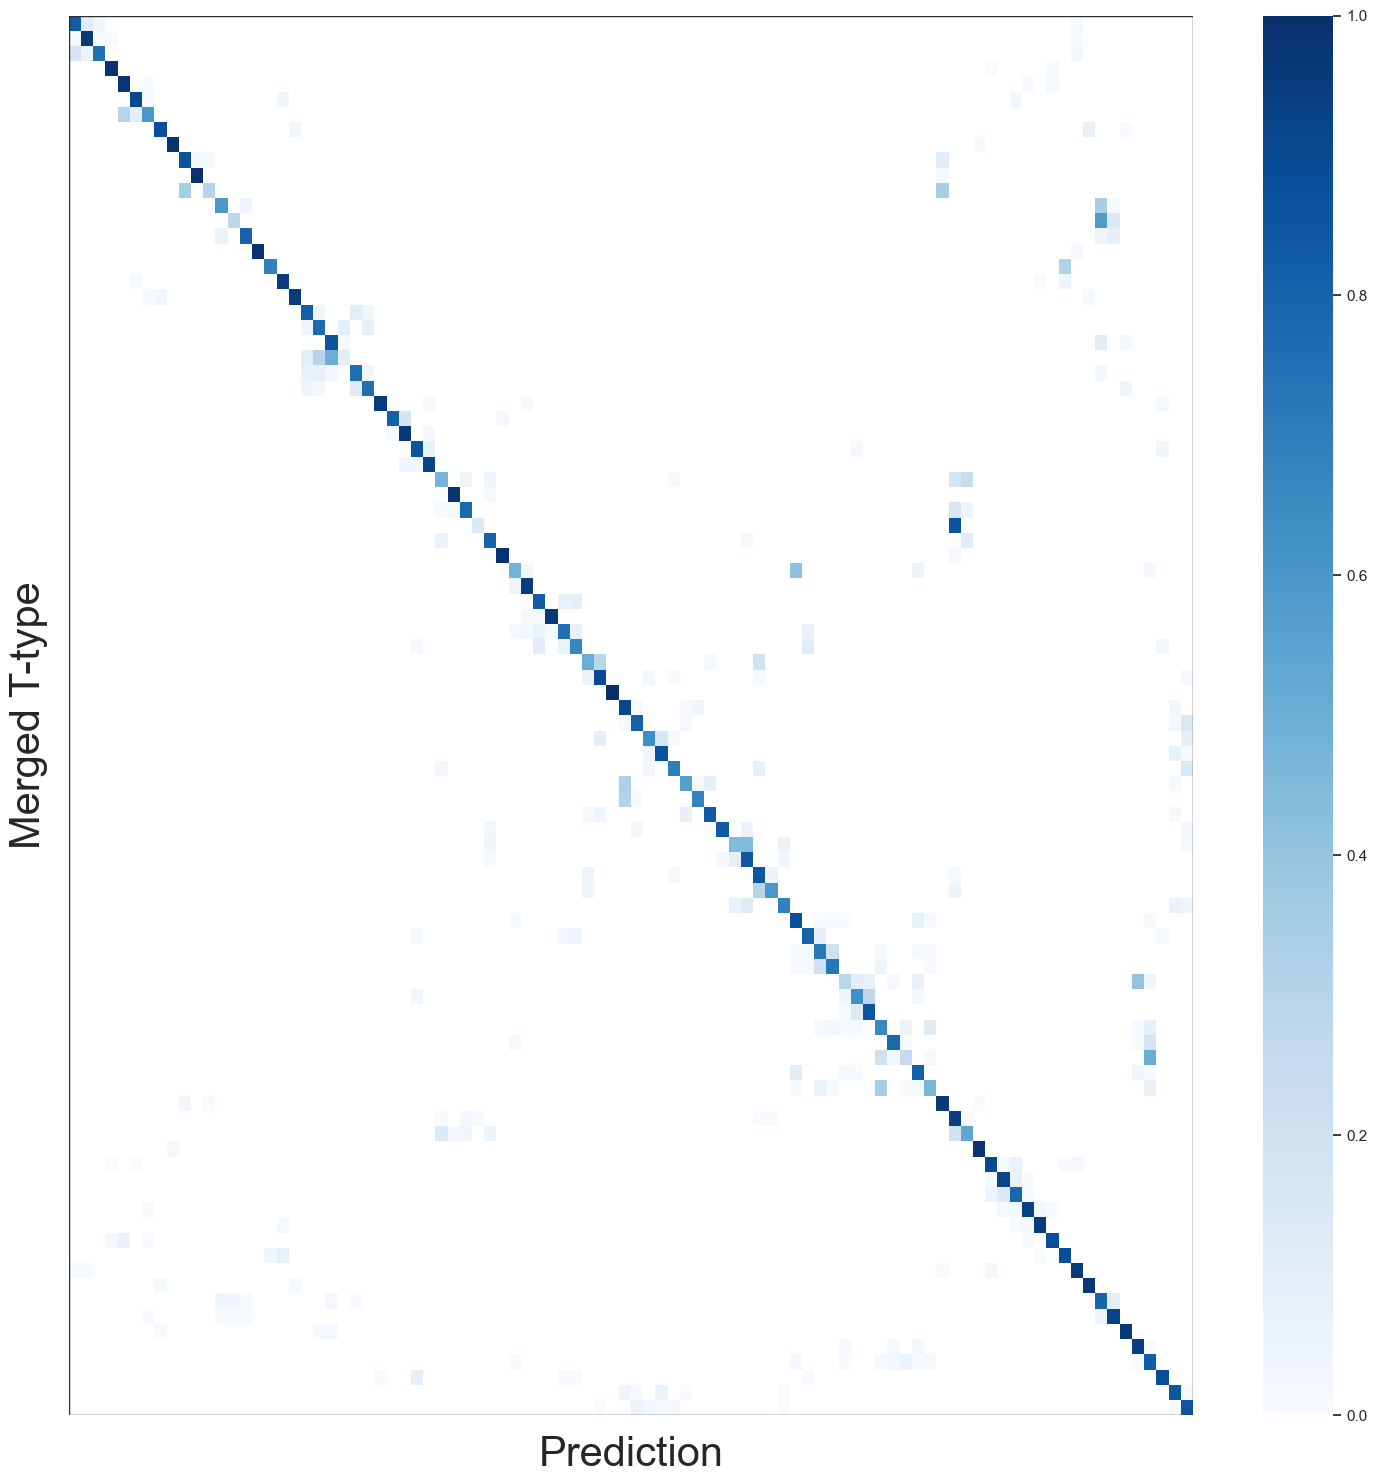

In [12]:
eps = 1e-3
plt.close('all')
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
mat = conf_mergT_lowD[0]
mat[mat < eps] = 0.
sns.set(font_scale=1.)
sns.set_theme()
sns.set(rc={'axes.facecolor':'white'})
sns.heatmap(mat, xticklabels=[], yticklabels=[], vmin=0, vmax=1, ax=axs, cmap='Blues', 
            cbar_kws={"shrink": 1}, mask=(mat==0))
axs.set_ylabel('Merged T-type', fontsize=30, labelpad=15)
axs.set_xlabel('Prediction', fontsize=30, labelpad=15)
axs.set_yticklabels(axs.get_yticklabels())
axs.axhline(y=0, color='#2d2d2d',linewidth=1)
axs.axhline(y=mat.shape[0], color='#2d2d2d',linewidth=1)
axs.axvline(x=0, color='#2d2d2d',linewidth=1)
axs.axvline(x=mat.shape[1], color='#2d2d2d',linewidth=1)
fig.tight_layout()
fig.savefig(saving_folder + f'/conf_merged_Ttype_lowD.png', dpi=1000, bbox_inches='tight')
plt.show()

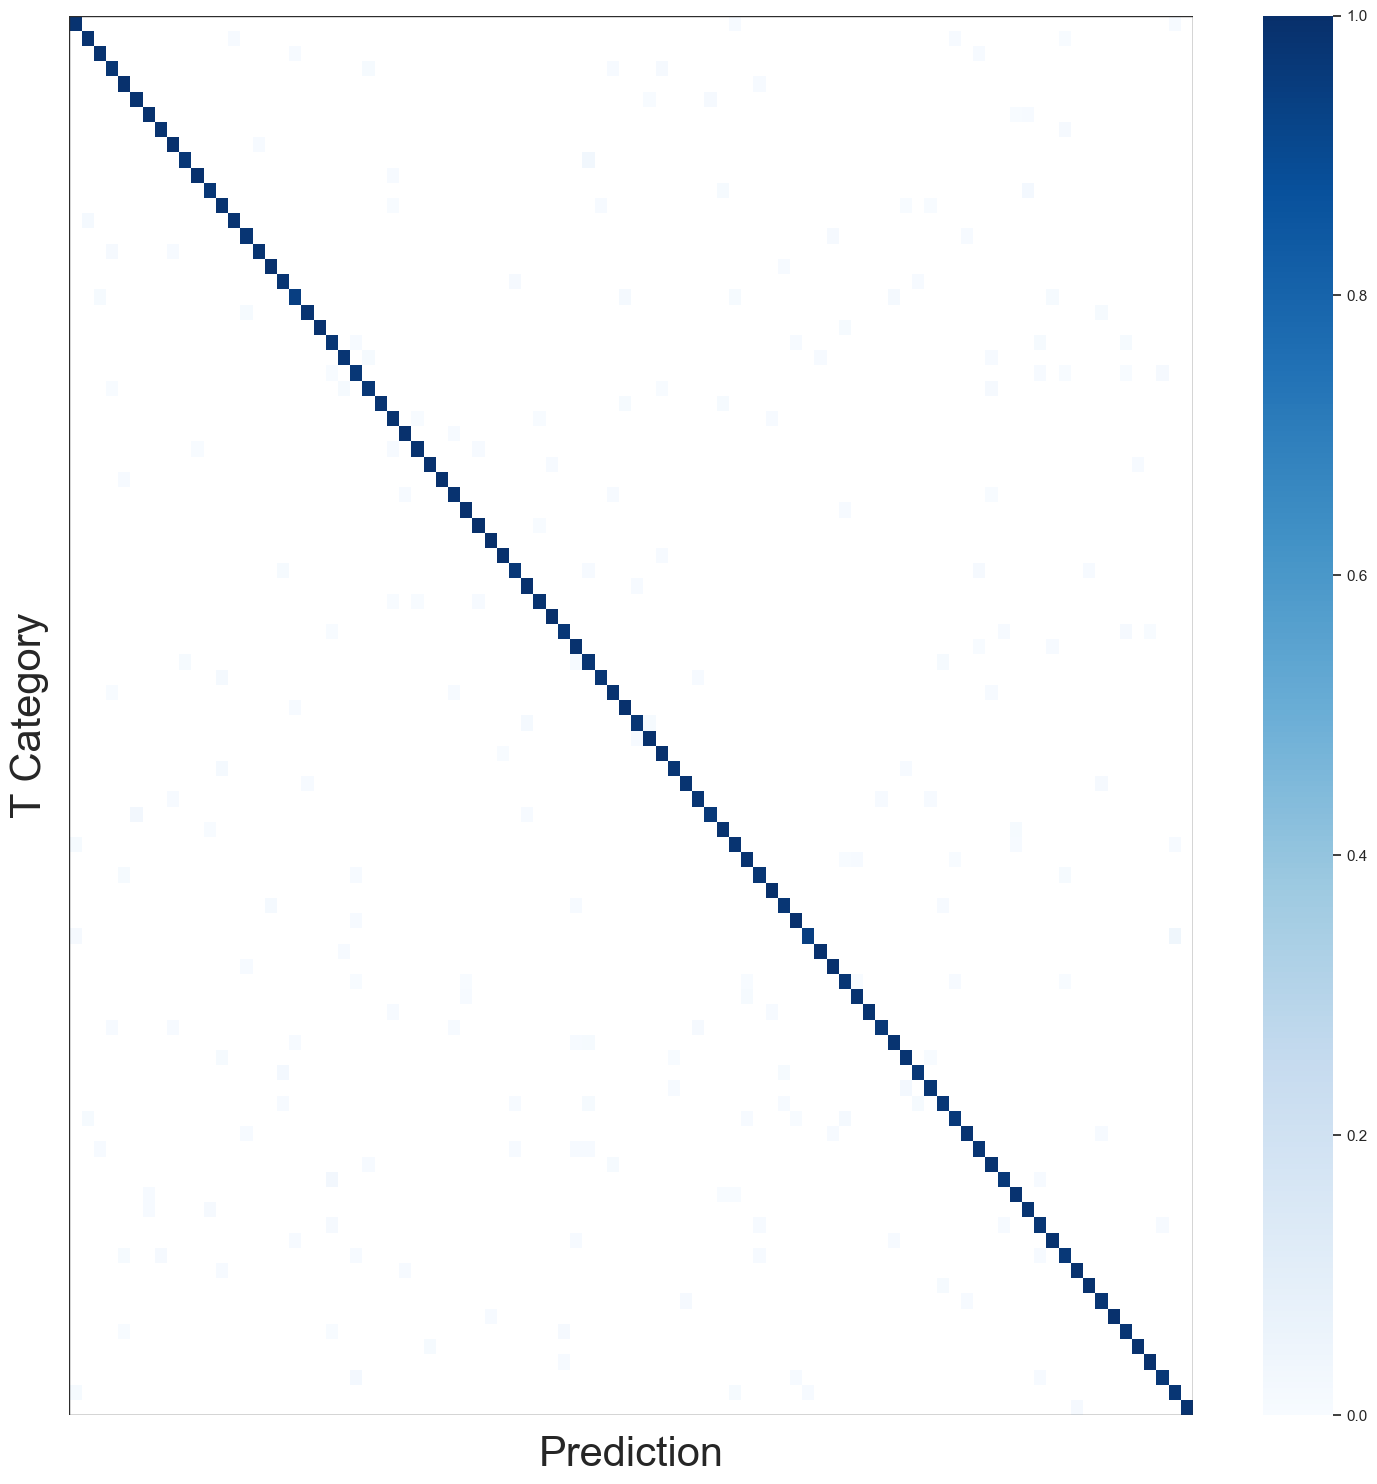

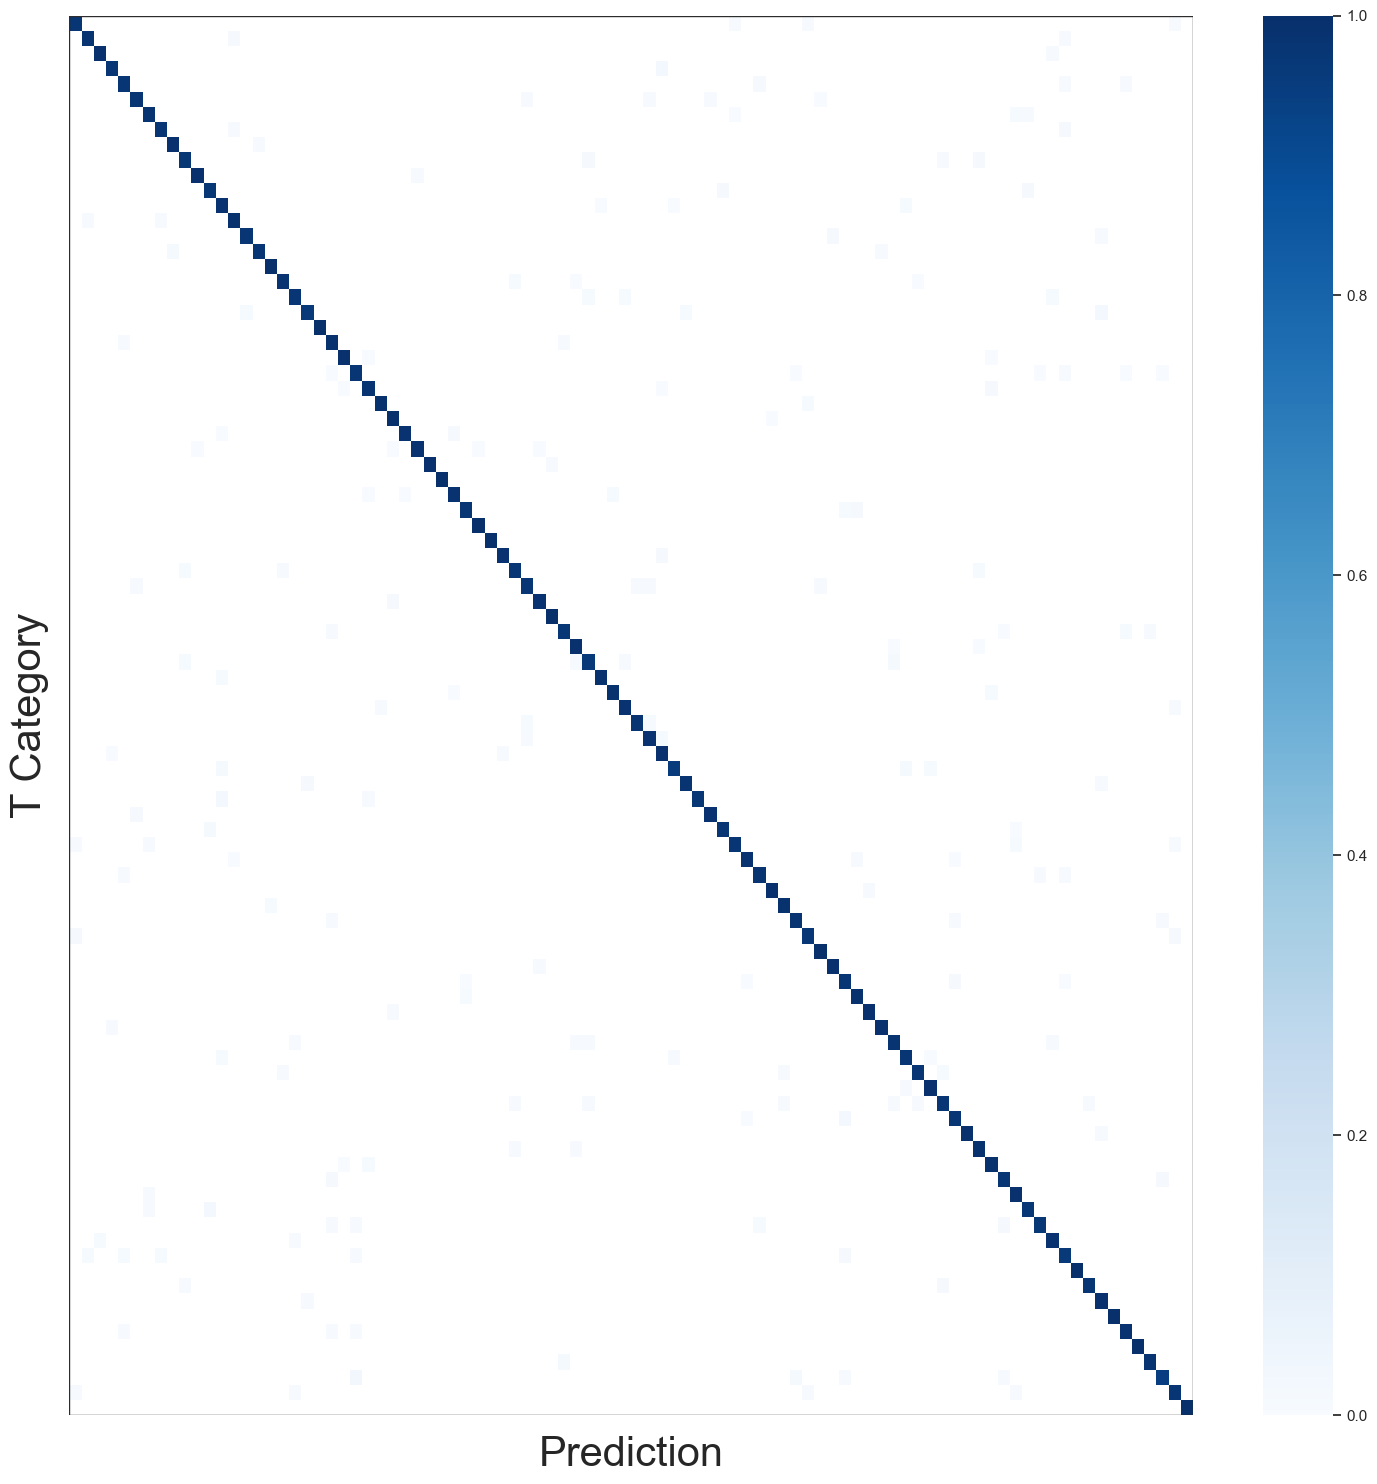

In [13]:
for arm in range(n_arm):
    plt.close('all')
    fig, axs = plt.subplots(1, 1, figsize=(15, 15))
    sns.set(font_scale=1.)
    mat = conf_cons_lowD[arm]
    mat[mat < eps]= 0.
    sns.set_theme()
    sns.set(rc={'axes.facecolor':'white'})
    sns.heatmap(mat, xticklabels=[], yticklabels=[], vmin=0, vmax=1, ax=axs, cmap='Blues', 
                cbar_kws={"shrink": 1}, mask=(mat==0))
    axs.set_ylabel('T Category', fontsize=30, labelpad=15)
    axs.set_xlabel('Prediction', fontsize=30, labelpad=15)
    axs.set_yticklabels(axs.get_yticklabels())
    axs.axhline(y=0, color='#2d2d2d',linewidth=1)
    axs.axhline(y=mat.shape[0], color='#2d2d2d',linewidth=1)
    axs.axvline(x=0, color='#2d2d2d',linewidth=1)
    axs.axvline(x=mat.shape[1], color='#2d2d2d',linewidth=1)
    fig.tight_layout()
    fig.savefig(saving_folder + f'/conf_cons_T_lowD_arm_{arm}.png', dpi=1000, bbox_inches='tight')
    plt.show()